In [38]:
import boto3

In [39]:
import pandas as pd
from io import StringIO

In [40]:
# Set up S3 client
client = boto3.client('s3')

In [41]:
bucket_name = 'viamericas-datalake-dev-us-east-1-283731589572-analytics'
path = 'Forecast/Forecast_analysis/forecast_7d_20_03_2023/' # Folder under analysis

In [42]:
# Listing objects 
elements = client.list_objects(Bucket=bucket_name, Prefix=path)

In [43]:
# Initialize an empty list 
dfs = []

In [44]:
# Iterate through each CSV in the S3 path
for obj in elements.get('Contents', []):
#    print(obj)
    # Check if the object is a CSV file
    if obj['Key'].endswith('.csv'):
        # Read CSV content from S3
        response = client.get_object(Bucket=bucket_name, Key=obj['Key'])
        print(obj['Key'])
        csv_content = response['Body'].read().decode('utf-8')

        # Transform CSV content to df
        df = pd.read_csv(StringIO(csv_content))

        dfs.append(df)

Forecast/Forecast_analysis/forecast_7d_20_03_2023/forecast_7d_20_03_2023_2024-01-16T14-04-12Z_part0.csv
Forecast/Forecast_analysis/forecast_7d_20_03_2023/forecast_7d_20_03_2023_2024-01-16T14-04-12Z_part1.csv
Forecast/Forecast_analysis/forecast_7d_20_03_2023/forecast_7d_20_03_2023_2024-01-16T14-04-12Z_part10.csv
Forecast/Forecast_analysis/forecast_7d_20_03_2023/forecast_7d_20_03_2023_2024-01-16T14-04-12Z_part11.csv
Forecast/Forecast_analysis/forecast_7d_20_03_2023/forecast_7d_20_03_2023_2024-01-16T14-04-12Z_part12.csv
Forecast/Forecast_analysis/forecast_7d_20_03_2023/forecast_7d_20_03_2023_2024-01-16T14-04-12Z_part13.csv
Forecast/Forecast_analysis/forecast_7d_20_03_2023/forecast_7d_20_03_2023_2024-01-16T14-04-12Z_part14.csv
Forecast/Forecast_analysis/forecast_7d_20_03_2023/forecast_7d_20_03_2023_2024-01-16T14-04-12Z_part15.csv
Forecast/Forecast_analysis/forecast_7d_20_03_2023/forecast_7d_20_03_2023_2024-01-16T14-04-12Z_part16.csv
Forecast/Forecast_analysis/forecast_7d_20_03_2023/forecas

In [45]:
final_df = pd.concat(dfs, ignore_index=True)

/tmp/ipykernel_196/3658546852.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat(dfs, ignore_index=True)


In [46]:
final_df['date'] = pd.to_datetime(final_df['date']).dt.date

In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   item_id  798 non-null    object 
 1   country  798 non-null    object 
 2   payer    798 non-null    object 
 3   date     798 non-null    object 
 4   p10      798 non-null    float64
 5   p50      798 non-null    float64
 6   p90      798 non-null    float64
 7   mean     798 non-null    float64
dtypes: float64(4), object(4)
memory usage: 50.0+ KB


In [48]:
final_df['item_id'].nunique()

114

In [49]:
final_df.payer.unique()

array(['elektra (bts)', 'argenper', 'merchantrade', 'afex',
       'g y t continental', 'bancoppel (appriza)', 'ficohsa', 'nafa',
       'girosmex', 'easy pagos', 'grupo exito (tn)', 'waldos (appriza)',
       'zeepay', 'banco daycoval', 'empenos del sur (anterior balsas)',
       'banco industrial', 'chedraui (appriza)',
       'cooperativa fronteriza (ut)', 'bbva uruguay (bts)', 'gme',
       'cooperativa cacil (ut)', 'ecuagiros',
       'micoope-fenacoac (red chapina)', 'cusca (citi - reciba networks)',
       'banco del austro', 'banorte (ut)', 'kori', 'global envios',
       'fedecaces (el salvador)', 'promerica', 'banco bisa', 'yes bank',
       'banco industrial els (red chapina)', 'banhcafe',
       'banco de credito del peru - bcp (ut)', 'bantrab (ut)',
       'transferto - thunes', 'abank (tn)', 'davivienda - honduras (bts)',
       'airpak', 'elektra (mexico)', 'transpay', 'banco atlantida',
       'banpro', 'banco davivienda salvadoreno (bts)',
       'banco ganadero (boliv

In [50]:
final_df.head()

,item_id,country,payer,date,p10,p50,p90,mean
0,51,guatemala,elektra (bts),2023-03-21,29519.762585,37291.267660,45578.670384,36870.663945
1,51,guatemala,elektra (bts),2023-03-22,25632.539760,35136.843840,42611.744460,34759.561344
2,51,guatemala,elektra (bts),2023-03-23,27026.626461,34809.681835,43297.548618,35333.045967
3,51,guatemala,elektra (bts),2023-03-24,50207.038024,64975.101835,79953.315963,65197.410554
4,51,guatemala,elektra (bts),2023-03-25,64054.757048,87026.447753,104174.127152,86026.755737


In [51]:
final_df.country.unique()

array(['guatemala', 'chile', 'indonesia', 'mexico', 'honduras', 'guinea',
       'gambia, the', 'ecuador', 'colombia', 'cameroon', 'brazil',
       'uruguay', 'nepal', "cote d'ivoire (ivory coast)", 'ghana',
       'el salvador', 'burkina faso', 'malaysia', 'bolivia', 'india',
       'togo', 'peru', 'portugal', 'spain', 'benin', 'nicaragua',
       'united states (atm & deposits)', 'dominican republic', 'haiti',
       'philippines', 'bangladesh', 'nigeria', 'costa rica', 'thailand',
       'argentina', 'sierra leone', 'united states', 'senegal'],
      dtype=object)

In [52]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
final_df['payer_country'] = final_df['payer'] + '_' + final_df['country']

In [53]:
final_df['payer_country'].nunique()

114

In [54]:
final_df.country.nunique()

38

In [55]:
final_df['date'] = pd.to_datetime(final_df['date'])

In [56]:
##TOP 10 FORECAST AMOUNTS BETWEEN 21/03/2023 AND 28/03/2023##
total_amount_per_payer =final_df.groupby('payer_country')['mean'].sum()
top_10_payers = total_amount_per_payer.sort_values(ascending=False).head(10)
print(top_10_payers)

payer_country
elektra (mexico)_mexico                 5.597490e+07
bancoppel (appriza)_mexico              3.159530e+07
banrural (ryt)_guatemala                2.584449e+07
banco industrial_guatemala              2.003142e+07
envios con clabe (appriza)_mexico       6.146971e+06
bbva - bancomer (bts)_mexico            5.077801e+06
banco de occidente_honduras             3.919774e+06
banorte (ut)_mexico                     3.676410e+06
telecomm telegrafos (appriza)_mexico    3.549356e+06
banco atlantida_honduras                3.442042e+06
Name: mean, dtype: float64


In [57]:
##TIME INTERVAL FORECAST##
final_df.date.min(),final_df.date.max(),

(Timestamp('2023-03-21 00:00:00'), Timestamp('2023-03-27 00:00:00'))

In [58]:
final_df['mean'].sum()

213806698.96723115

In [59]:
control=final_df.loc[final_df.country=='mexico']

In [60]:
control['mean'].sum()

114511311.42936768

In [61]:
pip install pyathena


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [62]:
from pyathena import connect

In [63]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name= 'analytics'
table_name = 'daily_check'

In [64]:
#Connection
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')
df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)

/tmp/ipykernel_196/3276710735.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_check = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name}.{table_name};', conn)


In [65]:
df_check['date'] = pd.to_datetime(df_check['date'])

In [66]:
df_check=df_check.loc[(df_check.date>'20-03-2023') & (df_check.date<'28-03-2023')]

In [67]:
df_check.date.min(),df_check.date.max()

(Timestamp('2023-03-21 00:00:00'), Timestamp('2023-03-27 00:00:00'))

In [68]:
df_check.head()

,payer,country,date,tx,amount,coupon_count
166,BANCO DE ORO (BDO),PHILIPPINES,2023-03-22,203,212914.19,4
286,KORI,BURKINA FASO,2023-03-26,1,489.39,0
449,BANCO BISA,BOLIVIA,2023-03-23,10,2860.00,0
540,MASTERCARD ATM NETWORK,UNITED STATES,2023-03-25,11,3100.00,0
640,FARMACIAS DEL AHORRO (DATRANSFER),MEXICO,2023-03-25,2,150.00,1


In [69]:
df_check.country.nunique()

47

In [70]:
df_check.payer.nunique()

101

In [71]:
df_check.amount.sum()

200213590.0124

In [72]:
control2=df_check.loc[df_check.country=='MEXICO']

In [73]:
control2.amount.sum()

103458398.80240001

In [74]:
df_check.country.unique()

array(['PHILIPPINES', 'BURKINA FASO', 'BOLIVIA', 'UNITED STATES',
       'MEXICO', 'NIGERIA', 'SPAIN', 'GUATEMALA', 'INDONESIA', 'ECUADOR',
       'BANGLADESH', 'SENEGAL', 'SWITZERLAND',
       "COTE D'IVOIRE (IVORY COAST)", 'COLOMBIA', 'ITALY', 'HONDURAS',
       'EL SALVADOR', 'UNITED STATES (ATM & DEPOSITS)', 'INDIA',
       'NICARAGUA', 'BELGIUM', 'PERU', 'TOGO', 'GUINEA', 'CHILE',
       'PORTUGAL', 'MALI', 'GHANA', 'HAITI', 'GAMBIA, THE', 'FRANCE',
       'SIERRA LEONE', 'ARGENTINA', 'NEPAL', 'BRAZIL',
       'DOMINICAN REPUBLIC', 'BENIN', 'THAILAND', 'COSTA RICA', 'LIBERIA',
       'LUXEMBOURG', 'GERMANY', 'CHAD', 'URUGUAY', 'CAMEROON',
       'UNITED KINGDOM'], dtype=object)

In [75]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_check['payer_country'] = df_check['payer'] + '_' + df_check['country']

In [76]:
##TOP 10 DAILY_CHECK AMOUNTS BETWEEN 21/03/2023 AND 28/03/2023##
total_amount_per_payer2 =df_check.groupby('payer_country')['amount'].sum()
top_10_payers2 = total_amount_per_payer2.sort_values(ascending=False).head(10)
print(top_10_payers2)

payer_country
ELEKTRA (MEXICO)_MEXICO                 5.027782e+07
BANCOPPEL (APPRIZA)_MEXICO              2.878941e+07
BANRURAL (RYT)_GUATEMALA                2.572086e+07
BANCO INDUSTRIAL_GUATEMALA              1.943539e+07
ENVIOS CON CLABE (APPRIZA)_MEXICO       5.539103e+06
BBVA - BANCOMER (BTS)_MEXICO            4.528607e+06
BANCO DE OCCIDENTE_HONDURAS             3.869803e+06
BANORTE (UT)_MEXICO                     3.383742e+06
BANCO ATLANTIDA_HONDURAS                3.312693e+06
TELECOMM TELEGRAFOS (APPRIZA)_MEXICO    3.068002e+06
Name: amount, dtype: float64


In [77]:
final_df.country.unique()

array(['guatemala', 'chile', 'indonesia', 'mexico', 'honduras', 'guinea',
       'gambia, the', 'ecuador', 'colombia', 'cameroon', 'brazil',
       'uruguay', 'nepal', "cote d'ivoire (ivory coast)", 'ghana',
       'el salvador', 'burkina faso', 'malaysia', 'bolivia', 'india',
       'togo', 'peru', 'portugal', 'spain', 'benin', 'nicaragua',
       'united states (atm & deposits)', 'dominican republic', 'haiti',
       'philippines', 'bangladesh', 'nigeria', 'costa rica', 'thailand',
       'argentina', 'sierra leone', 'united states', 'senegal'],
      dtype=object)

In [78]:
final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

/tmp/ipykernel_196/2399063668.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df = final_df.applymap(lambda x: x.upper() if isinstance(x, str) else x)


In [79]:
final_df.country.unique()

array(['GUATEMALA', 'CHILE', 'INDONESIA', 'MEXICO', 'HONDURAS', 'GUINEA',
       'GAMBIA, THE', 'ECUADOR', 'COLOMBIA', 'CAMEROON', 'BRAZIL',
       'URUGUAY', 'NEPAL', "COTE D'IVOIRE (IVORY COAST)", 'GHANA',
       'EL SALVADOR', 'BURKINA FASO', 'MALAYSIA', 'BOLIVIA', 'INDIA',
       'TOGO', 'PERU', 'PORTUGAL', 'SPAIN', 'BENIN', 'NICARAGUA',
       'UNITED STATES (ATM & DEPOSITS)', 'DOMINICAN REPUBLIC', 'HAITI',
       'PHILIPPINES', 'BANGLADESH', 'NIGERIA', 'COSTA RICA', 'THAILAND',
       'ARGENTINA', 'SIERRA LEONE', 'UNITED STATES', 'SENEGAL'],
      dtype=object)

In [80]:
df_forecast = pd.merge(df_check, final_df, on=['date','payer','country'], how='outer', indicator=True)

In [81]:
df_forecast._merge.value_counts()

_merge
both          676
right_only    122
left_only     115
Name: count, dtype: int64

In [82]:
control3=df_forecast.loc[df_forecast._merge=='left_only']
control3.payer.unique()

array(['BANCO PICHINCHA (TN)', 'TRANSPAY', '24XORO',
       'BANK OF PHILIPPINE ISLANDS (BPI)', 'TRANSFERTO - THUNES',
       'EXPIRED ORDERS', 'KORI', 'DEPOSITOS BANCARIOS GUATEMALA - ACH',
       'BNB', 'CASHWAY', 'ARGENPER', 'TELEDOLAR (TN)',
       'TELEDOLAR-NIC (TN)', '7 ELEVEN (UT)', 'NAFA',
       'BANCO INDUSTRIAL GT ATM (RED CHAPINA)'], dtype=object)

In [83]:
control4=df_forecast.loc[df_forecast._merge=='right_only']
control4.payer.unique()

array(['ZEEPAY', 'BBVA URUGUAY (BTS)', 'GME', 'KORI', 'MERCHANTRADE',
       'BANCO INDUSTRIAL ELS (RED CHAPINA)', 'NAFA',
       'TRANSFERTO - THUNES', 'TRANSPAY', 'MASTERCARD ATM NETWORK',
       'AFEX', 'FARMACIAS DEL AHORRO (DATRANSFER)', 'TELEDOLAR-NIC',
       'TIGO MONEY', 'VTN', 'BANSEFI - BANCO DEL BIENESTAR',
       'SPEED MONEY', 'TELEDOLAR', 'AFRO INTERNACIONAL',
       'BANCO POPULAR HONDURAS (UT)', 'M. LHUILLIER'], dtype=object)

In [84]:
##ESTO SE NOS ESTARÍAMOS PERDIENDO EN 200 MILLONES (0.25%), ENCONTRAR DIFERENCIAS LUEGO, POR AHORA AVANZAR EN MAPES##
## CUIDADO QUE PUEDE SUCEDER TAMBIEN QUE LOS PAYERS PEQUEÑOS, NO OPEREN AGÚN DIA Y ESO EXPLIQUE QUE NO HAYA MERGE PERFECTO##
control4['mean'].sum()

508867.64952901413

In [85]:
control4.country.unique()

array(['CAMEROON', 'URUGUAY', 'NEPAL', "COTE D'IVOIRE (IVORY COAST)",
       'BURKINA FASO', 'MALAYSIA', 'EL SALVADOR', 'TOGO', 'PORTUGAL',
       'BENIN', 'UNITED STATES (ATM & DEPOSITS)', 'MEXICO', 'NICARAGUA',
       'INDIA', 'NIGERIA', 'PHILIPPINES', 'COSTA RICA', 'GUINEA',
       'THAILAND', 'BANGLADESH', 'HONDURAS'], dtype=object)

In [86]:
control5=df_forecast.loc[df_forecast._merge=='both']
control5.payer.unique()

array(['BANCO DE ORO (BDO)', 'KORI', 'BANCO BISA',
       'MASTERCARD ATM NETWORK', 'FARMACIAS DEL AHORRO (DATRANSFER)',
       'TRANSFERTO - THUNES', 'PROMERICA (GUA)', 'MERCHANTRADE',
       'BANCO GANADERO (BOLIVIA)', 'CHEDRAUI (APPRIZA)', 'ZEEPAY',
       'METROBANK', 'ELEKTRA (BTS)', 'BANCO POPULAR HONDURAS (UT)',
       'BANCO DAVIVIENDA SALVADORENO (BTS)', 'YES BANK',
       'BANCO INDUSTRIAL ELS (RED CHAPINA)', 'LAFISE', 'ARGENPER', 'NAFA',
       'AFRO INTERNACIONAL', 'ENVICON (ANTERIORMENTE ENVIOS CONFIANZA)',
       'BANCO DE GUAYAQUIL', 'BANHCAFE', 'AFEX', 'VTN', 'UNITRANSFER',
       'BAM - BANCO AGROMERCANTIL (UT)', 'TRANSPAY', 'ABANK (TN)',
       'VIAMERICAS USA DEPOSITS', 'COOPERATIVA FRONTERIZA (UT)',
       'BANTRAB (UT)', 'BBVA - BANCOMER (BTS)', 'GRUPO EXITO (TN)',
       'BANCO RENDIMENTO', 'BANCO DE CREDITO DEL PERU - BCP (UT)',
       'EASY PAGOS', 'NAIRAGRAM', 'GIROSMEX', 'WALMART (UT)',
       'DAVIVIENDA', 'BANRURAL (RYT)', 'G Y T CONTINENTAL',
       'BANCO 

In [87]:
#7% DIF A UNA SEMANA##
control5.amount.sum(), control5['mean'].sum()

(198808627.13239998, 213297831.3177021)

In [88]:
df_forecast.amount.sum()

200213590.0124

In [89]:
##BANCO POPULAR HONDURAS (UT)en df_check#
control6= df_check.loc[df_check.payer=='BANCO POPULAR HONDURAS (UT)']
control6.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country
2814,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-26,5,6870.00,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
3168,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-27,6,2098.00,1,BANCO POPULAR HONDURAS (UT)_HONDURAS
3751,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-22,1,750.00,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
68641,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-25,9,5605.73,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
80318,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-21,0,0.00,0,BANCO POPULAR HONDURAS (UT)_HONDURAS
89982,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-24,4,1057.78,0,BANCO POPULAR HONDURAS (UT)_HONDURAS


In [90]:
##BANCO POPULAR HONDURAS (UT)en df_forecast#
control7= df_forecast.loc[df_forecast.payer=='BANCO POPULAR HONDURAS (UT)']
control7.head(7)

,payer,country,date,tx,amount,coupon_count,payer_country_x,item_id,p10,p50,p90,mean,payer_country_y,_merge
26,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-26,5.0,6870.00,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,544.581419,1395.973314,2326.048384,1397.257412,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
29,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-27,6.0,2098.00,1.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,348.080674,1250.992173,2143.997579,1208.023962,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
33,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-22,1.0,750.00,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,-92.230079,645.288467,1613.710828,696.062033,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
526,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-25,9.0,5605.73,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,189.796634,1338.655755,2401.262219,1301.095310,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
638,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-21,0.0,0.00,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,530.582620,1665.318140,2866.739192,1638.017024,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
712,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-24,4.0,1057.78,0.0,BANCO POPULAR HONDURAS (UT)_HONDURAS,24.0,352.160924,1450.635687,2451.004846,1387.608028,BANCO POPULAR HONDURAS (UT)_HONDURAS,both
905,BANCO POPULAR HONDURAS (UT),HONDURAS,2023-03-23,NaN,NaN,NaN,NaN,24.0,-281.138753,549.213736,1283.456143,517.009309,BANCO POPULAR HONDURAS (UT)_HONDURAS,right_only


In [91]:
##LA DIFERENCIAS SE EXPLICAN PORQUE LOS PAYERS PEQUEÑOS NO OPERAN TODOS LOS DIAS Y FORECAST LANZA UN PRONOSTICO A 7D (IMPUTAR ESOS DIAS)

In [92]:
df_forecast=df_forecast.loc[df_forecast._merge!='left_only']

In [93]:
df_forecast.amount.fillna(0, inplace=True)
df_forecast.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 912
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   payer            798 non-null    object        
 1   country          798 non-null    object        
 2   date             798 non-null    datetime64[ns]
 3   tx               676 non-null    float64       
 4   amount           798 non-null    float64       
 5   coupon_count     676 non-null    float64       
 6   payer_country_x  676 non-null    object        
 7   item_id          798 non-null    float64       
 8   p10              798 non-null    float64       
 9   p50              798 non-null    float64       
 10  p90              798 non-null    float64       
 11  mean             798 non-null    float64       
 12  payer_country_y  798 non-null    object        
 13  _merge           798 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(8), 

In [94]:
df_forecast_final=df_forecast.loc[:, ['payer','country','date','amount','p10','p50','p90','mean']]

In [95]:
df_forecast_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 912
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   payer    798 non-null    object        
 1   country  798 non-null    object        
 2   date     798 non-null    datetime64[ns]
 3   amount   798 non-null    float64       
 4   p10      798 non-null    float64       
 5   p50      798 non-null    float64       
 6   p90      798 non-null    float64       
 7   mean     798 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 56.1+ KB


In [96]:
# Grouping by 'payer' and 'country' concatenated for this level of granularity
df_forecast_final['payer_country'] = df_forecast_final['payer'] + '_' + df_forecast_final['country']

In [97]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country
0,BANCO DE ORO (BDO),PHILIPPINES,2023-03-22,212914.19,228630.385049,298943.428677,361957.466118,296433.638896,BANCO DE ORO (BDO)_PHILIPPINES
1,KORI,BURKINA FASO,2023-03-26,489.39,-12.026466,322.489811,691.351549,307.862093,KORI_BURKINA FASO
2,BANCO BISA,BOLIVIA,2023-03-23,2860.00,4933.543571,10803.110819,16656.797894,10804.662417,BANCO BISA_BOLIVIA
3,MASTERCARD ATM NETWORK,UNITED STATES,2023-03-25,3100.00,815.526774,2111.100007,3387.776849,2117.832856,MASTERCARD ATM NETWORK_UNITED STATES
4,FARMACIAS DEL AHORRO (DATRANSFER),MEXICO,2023-03-25,150.00,-39.015572,45.103621,133.145434,44.658318,FARMACIAS DEL AHORRO (DATRANSFER)_MEXICO


In [280]:
## MAPE A 1 DÍA POR PAYER##

In [281]:
##GENERAMOS EL ERROR DE PRONOSTICO##
##ELIMINAMOS LOS CASOS CON AMOUNT==0 PORQUE GENERA UNA INDETERMINACIÓN EN EL CÁLCULO (A/0=INF)
## Y SI IMPUTAMOS 1 EN VEZ DE CERO???###

In [282]:
## POR LO PRONTO ELIMINO LOS QUE TIENEN AMOUNT CERO Y EL MAPE ESTARÁ DEFINIDO BAJO ESA CONDICION##

In [283]:
df_forecast_final=df_forecast_final.loc[df_forecast_final.amount!=0]
df_forecast_final.shape

(659, 9)

In [352]:
df_forecast_final.head()

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe,ae
0,CHEDRAUI (APPRIZA),MEXICO,2023-03-23,1981.00,2311.355484,5272.187336,8344.431365,5254.561087,CHEDRAUI (APPRIZA)_MEXICO,1.652479,3273.561087
1,NAFA,GUINEA,2023-03-27,1850.00,1023.108039,1791.847259,2897.928564,1849.854749,NAFA_GUINEA,0.000079,0.145251
2,ARGENPER,CHILE,2023-03-26,1027.11,-45.506015,619.555388,1354.398316,638.037780,ARGENPER_CHILE,0.378803,389.072220
3,KORI,BURKINA FASO,2023-03-22,2475.00,50.442621,812.583371,1494.320570,848.433126,KORI_BURKINA FASO,0.657199,1626.566874
4,BANCO DE GUAYAQUIL,ECUADOR,2023-03-23,29371.00,22093.389717,30583.024040,40519.791403,30720.159349,BANCO DE GUAYAQUIL_ECUADOR,0.045935,1349.159349


In [357]:
control=df_forecast_final.loc[df_forecast_final.country=='MEXICO']
control
grouped = control.groupby('date').

In [284]:
###MAPE FORECAST A 1 DÍA##
forecast_1d=df_forecast_final.loc[df_forecast_final.date=='2023-03-21']

In [285]:
forecast_1d.shape

(95, 9)

In [286]:
forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)

/tmp/ipykernel_20/2323064100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_1d["pe"] = abs((forecast_1d.amount - forecast_1d['mean']) / forecast_1d.amount)


In [287]:
forecast_1d.pe.min(), forecast_1d.pe.max()

(0.002777274931708471, 7.384533235932863)

In [288]:
forecast_1d.head(2)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
6,BANHCAFE,HONDURAS,2023-03-21,3256.0,816.139674,3273.047946,5813.084225,3232.456264,BANHCAFE_HONDURAS,0.007231
8,YES BANK,INDIA,2023-03-21,1832.0,3559.144562,6766.228839,10159.701953,6858.677528,YES BANK_INDIA,2.743820


In [289]:
forecast_1d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country,pe
568,ELEKTRA (MEXICO),MEXICO,2023-03-21,5707730.530,5.759747e+06,6.394894e+06,7.241473e+06,6.377695e+06,ELEKTRA (MEXICO)_MEXICO,0.117378
534,BANCOPPEL (APPRIZA),MEXICO,2023-03-21,3123986.775,3.061426e+06,3.390117e+06,3.848881e+06,3.380146e+06,BANCOPPEL (APPRIZA)_MEXICO,0.081998
551,BANRURAL (RYT),GUATEMALA,2023-03-21,2653451.740,2.483920e+06,2.660576e+06,2.927479e+06,2.646082e+06,BANRURAL (RYT)_GUATEMALA,0.002777
535,BANCO INDUSTRIAL,GUATEMALA,2023-03-21,2170981.960,2.045542e+06,2.280319e+06,2.549060e+06,2.271968e+06,BANCO INDUSTRIAL_GUATEMALA,0.046516
282,ENVIOS CON CLABE (APPRIZA),MEXICO,2023-03-21,661009.880,6.647124e+05,7.608884e+05,8.616369e+05,7.588293e+05,ENVIOS CON CLABE (APPRIZA)_MEXICO,0.147985
529,BBVA - BANCOMER (BTS),MEXICO,2023-03-21,514965.220,5.266146e+05,6.346588e+05,7.283926e+05,6.307588e+05,BBVA - BANCOMER (BTS)_MEXICO,0.224857
772,MSBB MONEY,BRAZIL,2023-03-21,496059.170,3.861633e+05,4.882961e+05,5.759305e+05,4.857581e+05,MSBB MONEY_BRAZIL,0.020766
258,BANCO DE OCCIDENTE,HONDURAS,2023-03-21,470359.310,4.046283e+05,4.623704e+05,5.233132e+05,4.634002e+05,BANCO DE OCCIDENTE_HONDURAS,0.014795
252,G Y T CONTINENTAL,GUATEMALA,2023-03-21,461148.070,3.992665e+05,4.686682e+05,5.323922e+05,4.653899e+05,G Y T CONTINENTAL_GUATEMALA,0.009198
660,METROBANK,PHILIPPINES,2023-03-21,414642.200,3.997792e+05,4.681252e+05,5.457505e+05,4.691939e+05,METROBANK_PHILIPPINES,0.131563


In [290]:
##MAPE PROMEDIO A 1 D (para los que tienen MAPE definido)
forecast_1d.pe.mean()

0.42060555392874827

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


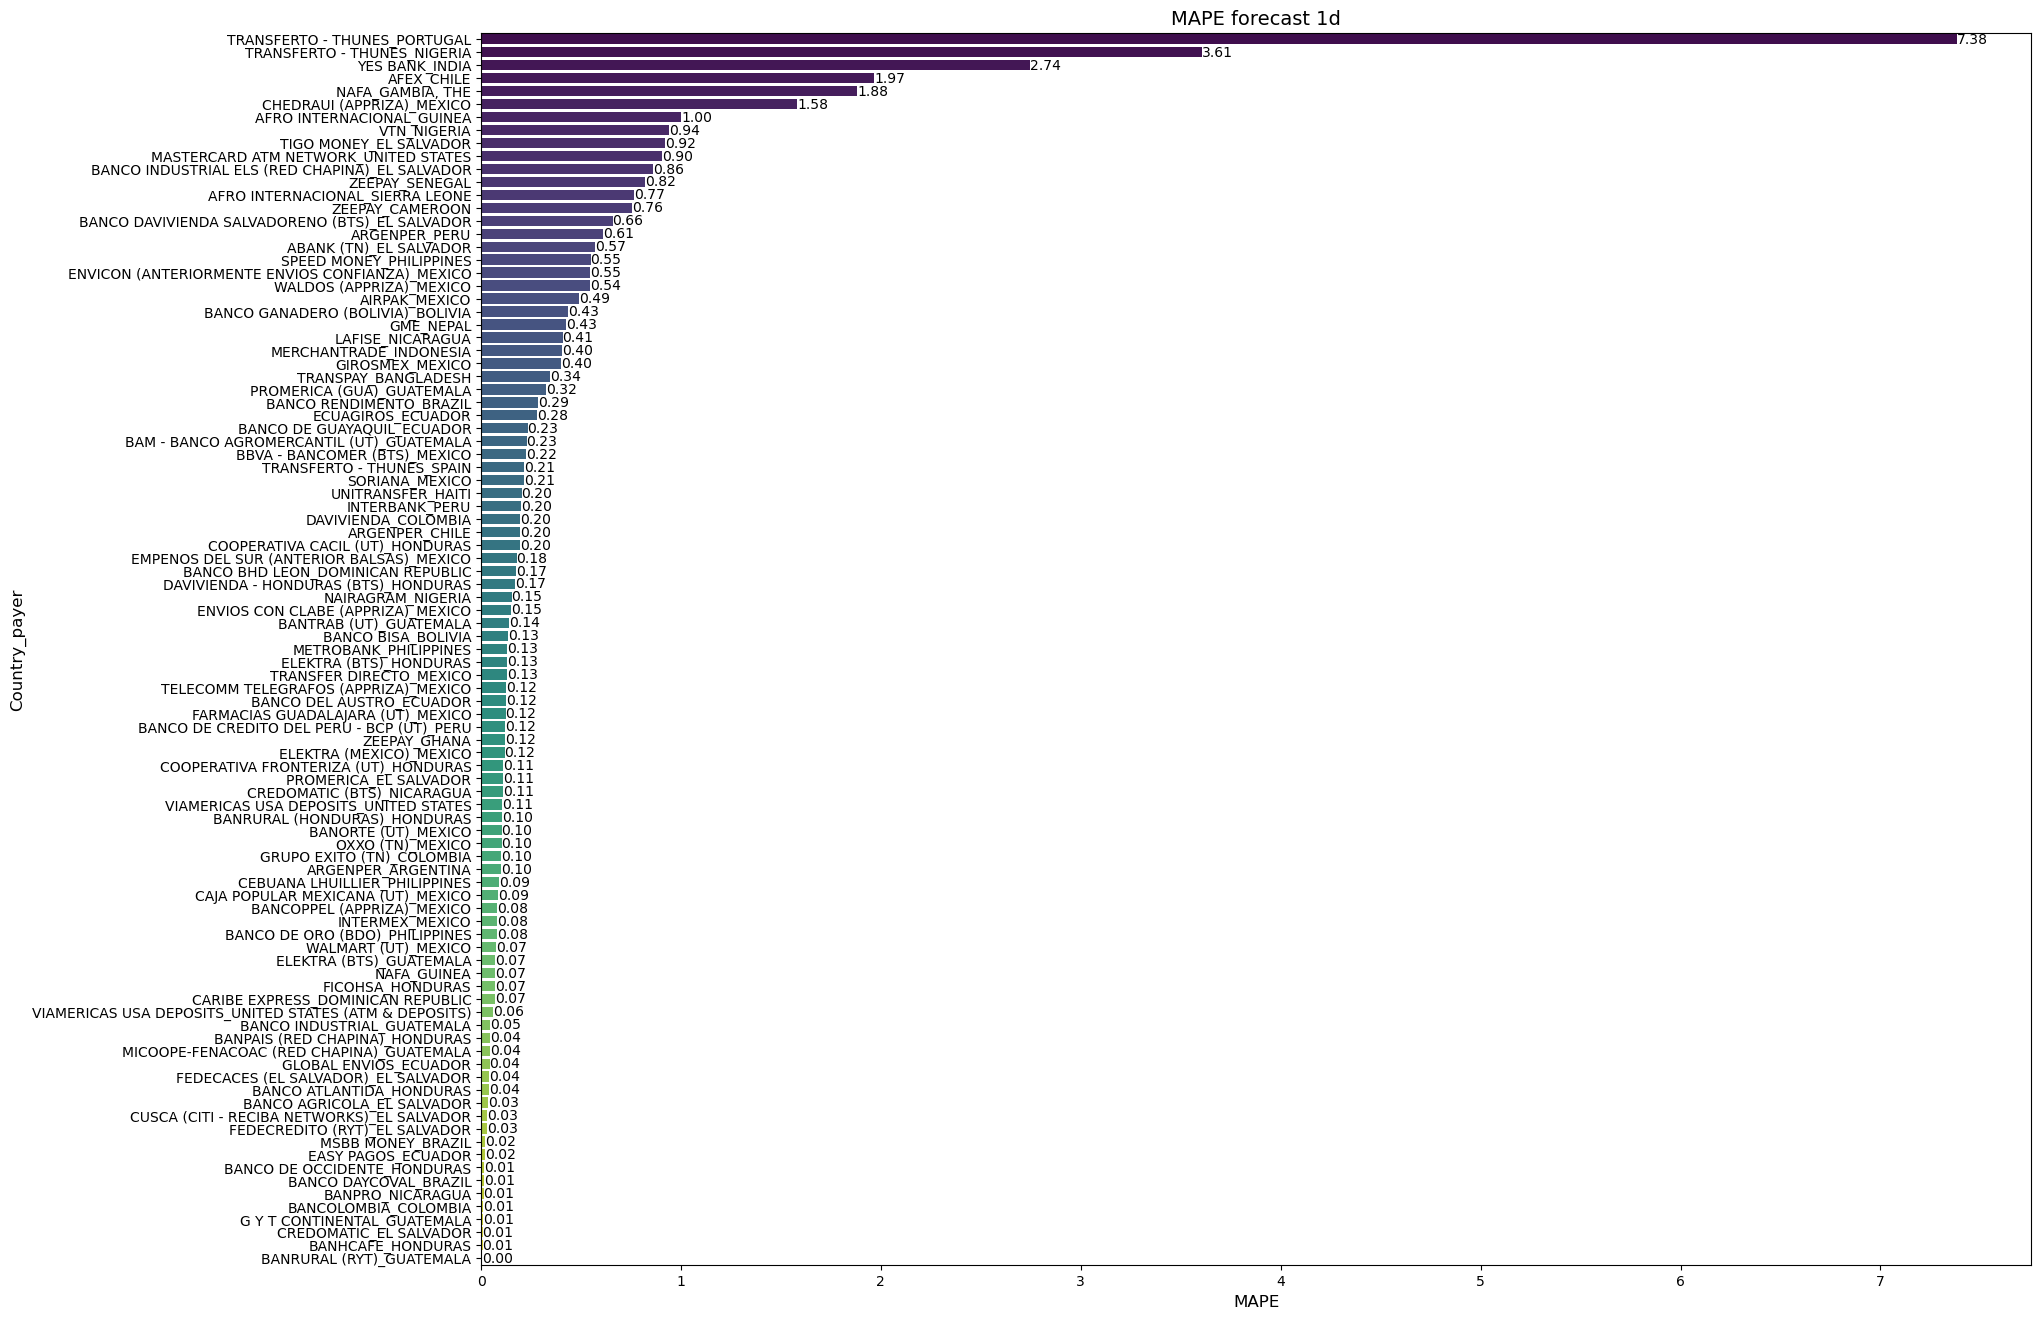

In [332]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

forecast_1d = forecast_1d.sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [292]:
##FORECAST 1D MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_1d_country = forecast_1d.groupby('country')['pe'].mean().reset_index()
forecast_1d_country.sort_values('pe')

,country,pe
29,UNITED STATES (ATM & DEPOSITS),0.060071
15,HONDURAS,0.088107
0,ARGENTINA,0.099518
6,COLOMBIA,0.102838
3,BRAZIL,0.106575
12,GUATEMALA,0.107755
11,GHANA,0.117734
7,DOMINICAN REPUBLIC,0.120460
8,ECUADOR,0.139125
20,NICARAGUA,0.175743


/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


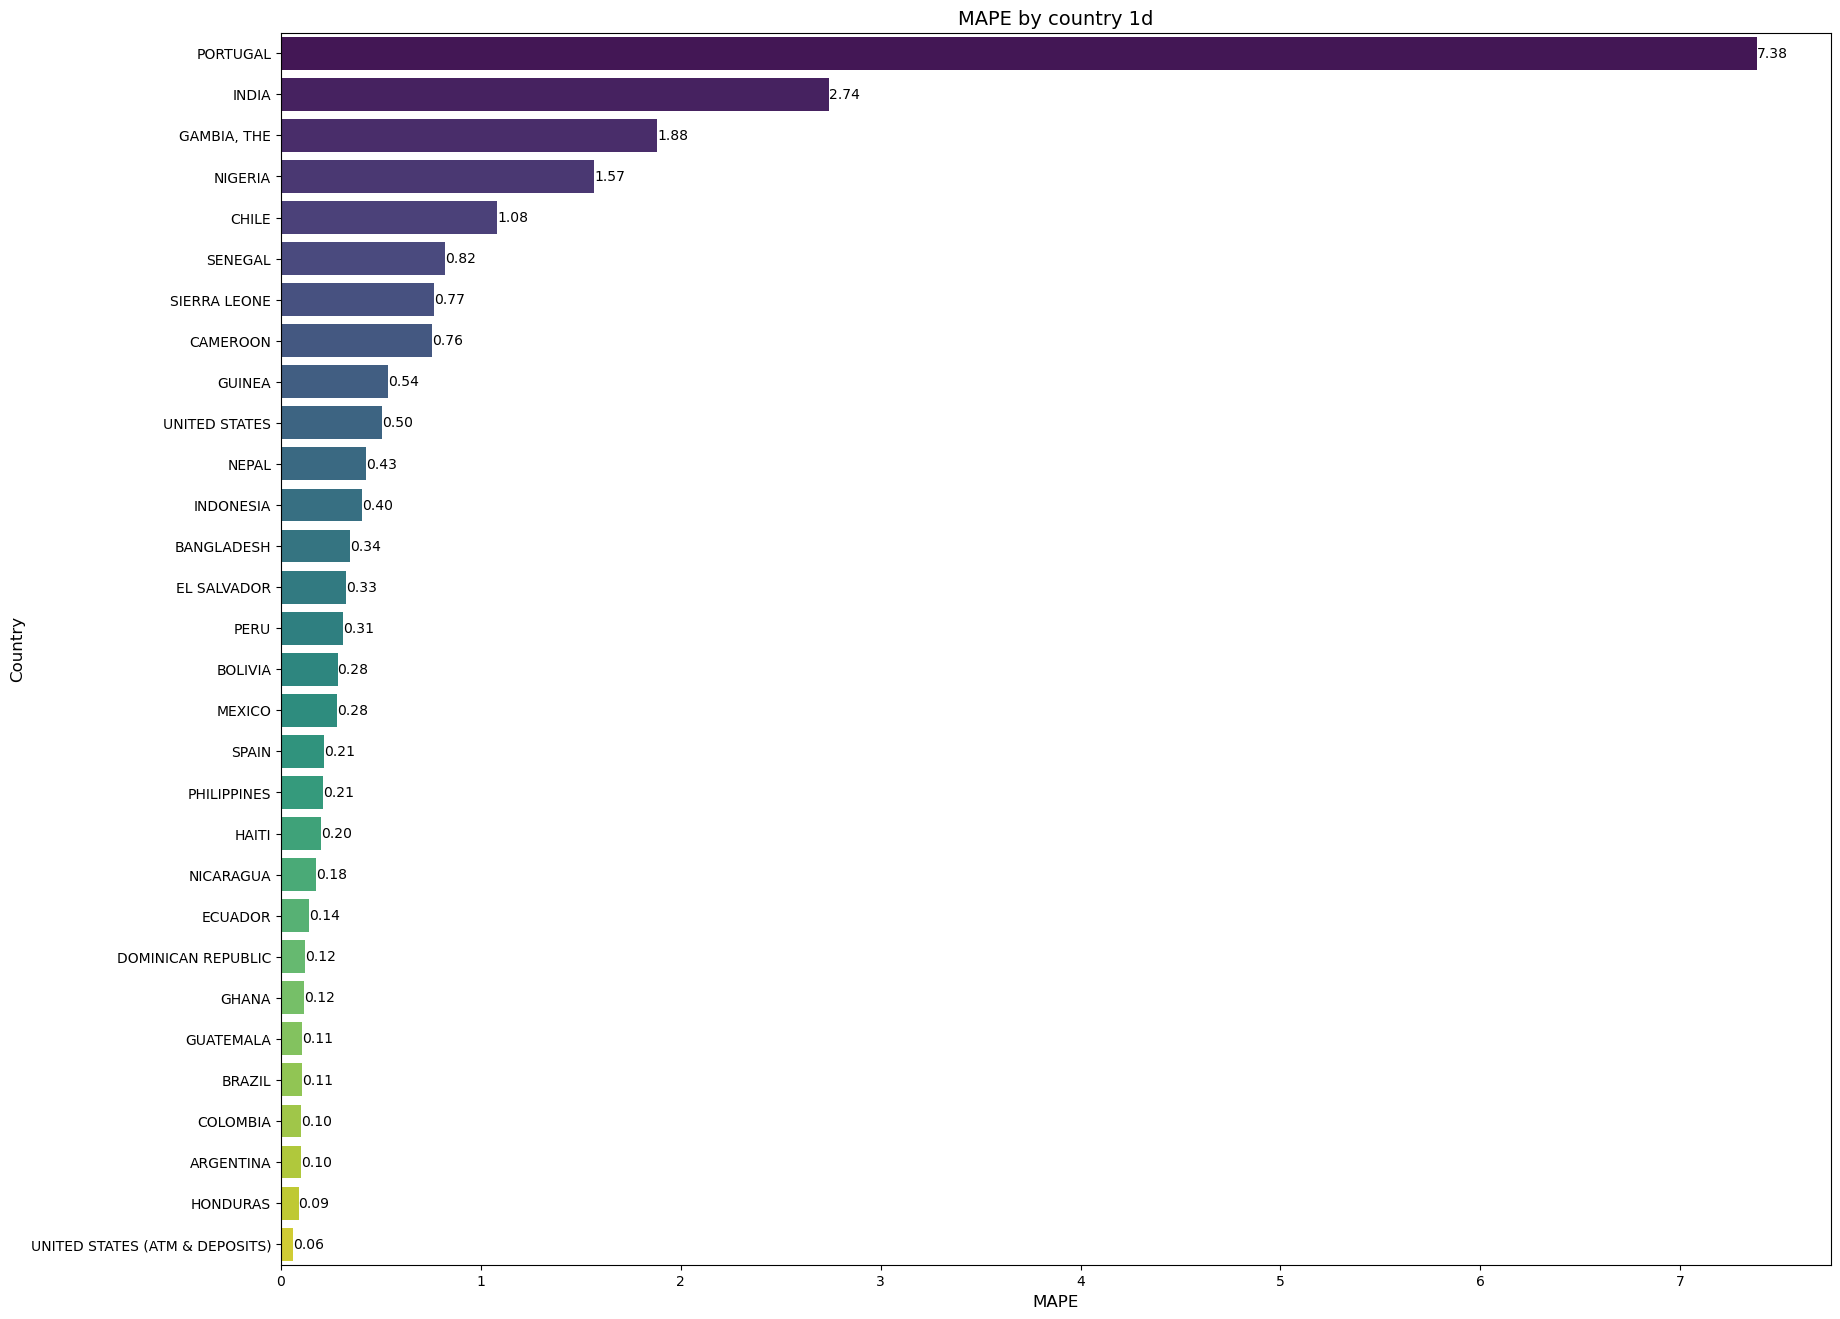

In [336]:
forecast_1d_country=forecast_1d_country.sort_values('pe', ascending=False)
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_1d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_1d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [294]:
##WAPE A 1 DÍA GENERAL##
forecast_1d["ae"] = abs((forecast_1d.amount - forecast_1d['mean']))
print(forecast_1d.ae.sum() / forecast_1d.amount.sum())

0.08417051019913777


In [295]:
##WAPE POR PAÍSES##

In [296]:
wape_country_f1d = forecast_1d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


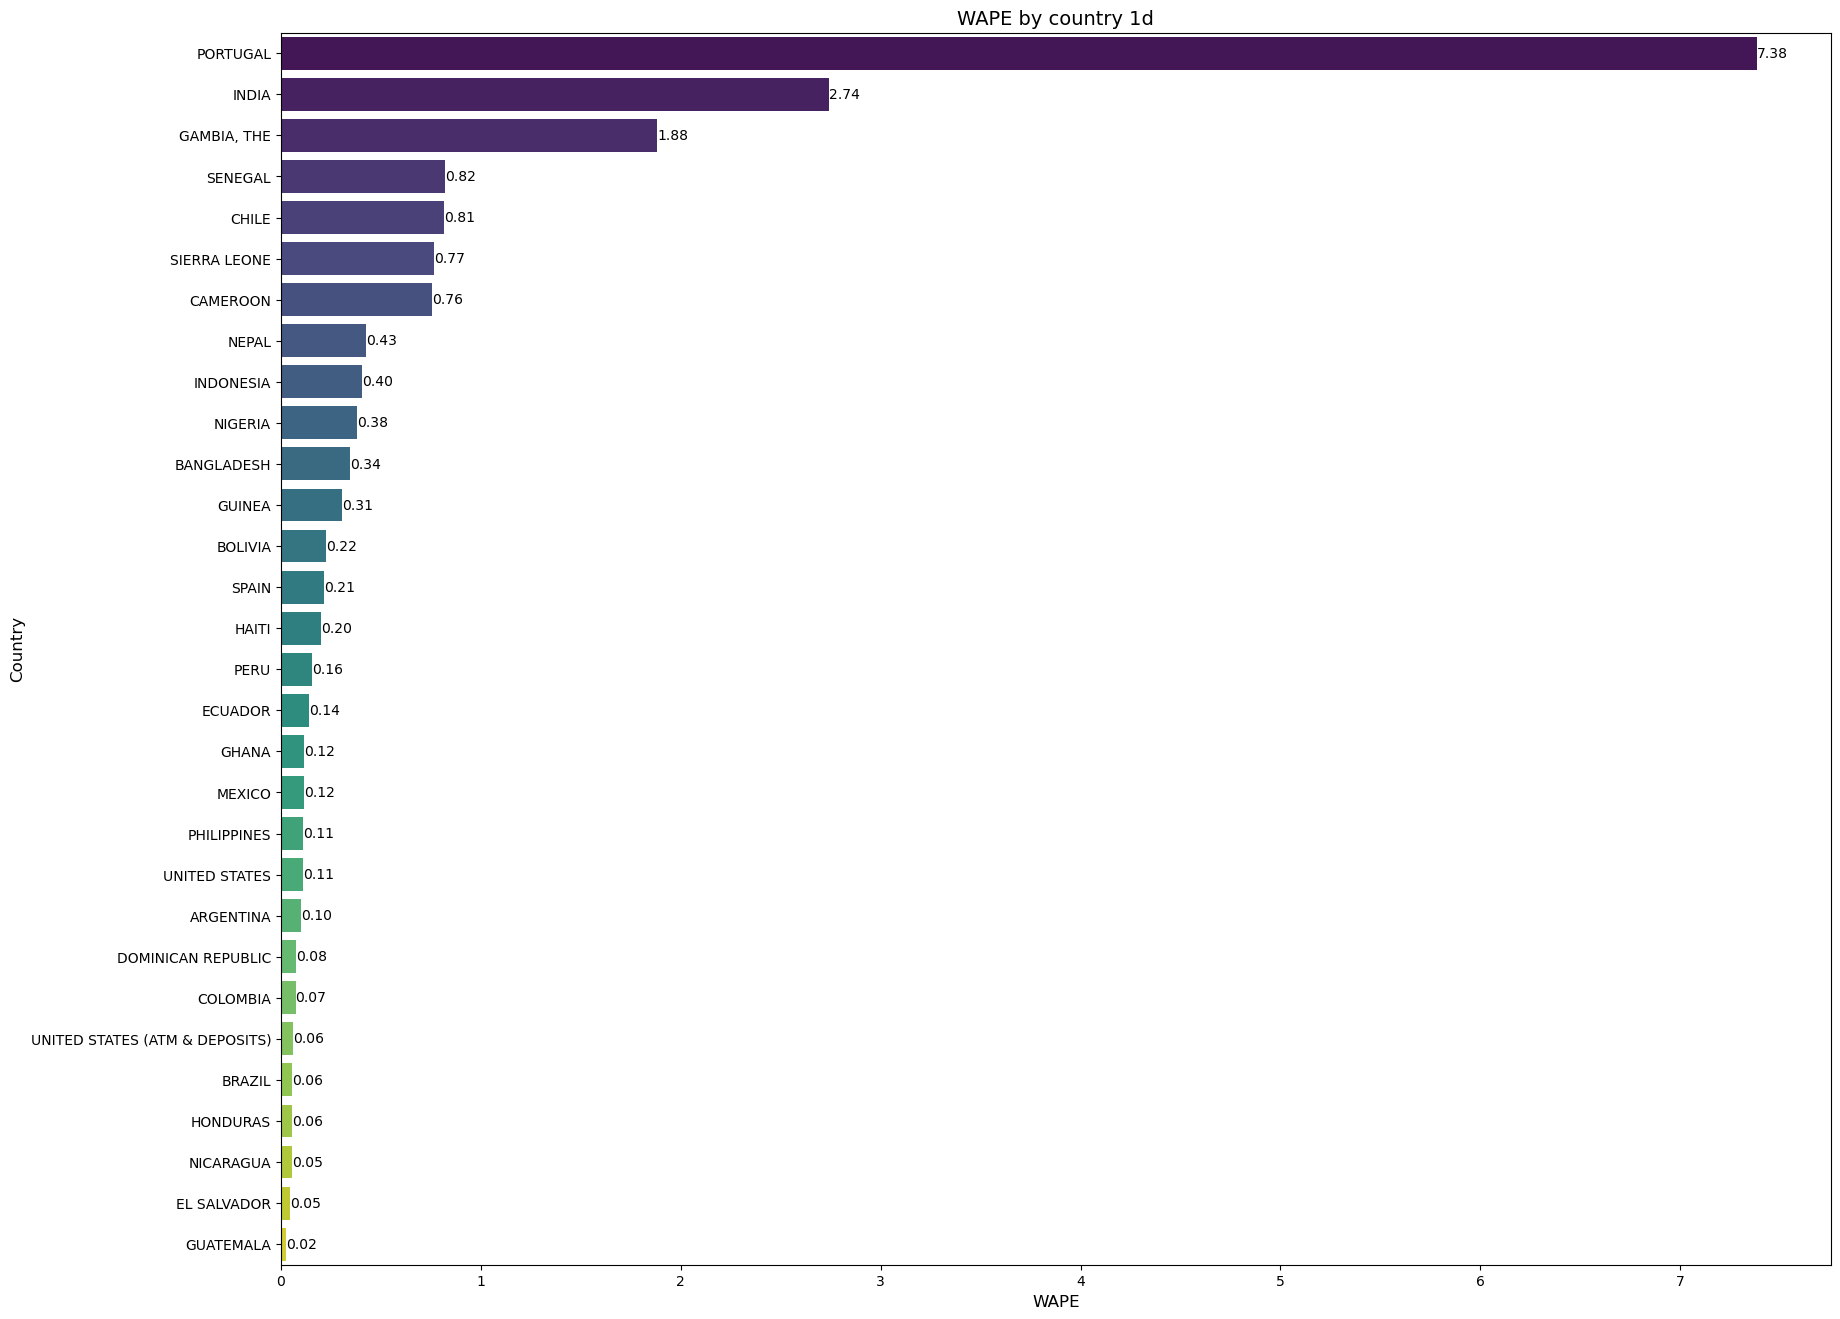

In [335]:
wape_country_f1d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f1d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 1d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f1d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()


In [298]:
##MAPE A 3 DIAS##
###MAPE FORECAST A 3 DÍAS##
forecast_3d=df_forecast_final.loc[df_forecast_final.date<='2023-03-23']

In [299]:
forecast_3d.sort_values('amount', ascending=False).head(10)

,payer,country,date,amount,p10,p50,p90,mean,payer_country
568,ELEKTRA (MEXICO),MEXICO,2023-03-21,5707730.530,5.759747e+06,6.394894e+06,7.241473e+06,6.377695e+06,ELEKTRA (MEXICO)_MEXICO
600,ELEKTRA (MEXICO),MEXICO,2023-03-23,5449342.940,5.789121e+06,6.292866e+06,7.167913e+06,6.313103e+06,ELEKTRA (MEXICO)_MEXICO
242,ELEKTRA (MEXICO),MEXICO,2023-03-22,5407997.390,5.301788e+06,6.038024e+06,6.756733e+06,6.027574e+06,ELEKTRA (MEXICO)_MEXICO
549,BANCOPPEL (APPRIZA),MEXICO,2023-03-23,3210780.780,3.321765e+06,3.636984e+06,4.151155e+06,3.649810e+06,BANCOPPEL (APPRIZA)_MEXICO
534,BANCOPPEL (APPRIZA),MEXICO,2023-03-21,3123986.775,3.061426e+06,3.390117e+06,3.848881e+06,3.380146e+06,BANCOPPEL (APPRIZA)_MEXICO
190,BANCOPPEL (APPRIZA),MEXICO,2023-03-22,3052581.610,2.865786e+06,3.299808e+06,3.723641e+06,3.293784e+06,BANCOPPEL (APPRIZA)_MEXICO
551,BANRURAL (RYT),GUATEMALA,2023-03-21,2653451.740,2.483920e+06,2.660576e+06,2.927479e+06,2.646082e+06,BANRURAL (RYT)_GUATEMALA
616,BANRURAL (RYT),GUATEMALA,2023-03-22,2345688.110,2.111982e+06,2.420165e+06,2.661412e+06,2.411837e+06,BANRURAL (RYT)_GUATEMALA
736,BANRURAL (RYT),GUATEMALA,2023-03-23,2207033.540,2.254877e+06,2.385272e+06,2.649774e+06,2.401733e+06,BANRURAL (RYT)_GUATEMALA
535,BANCO INDUSTRIAL,GUATEMALA,2023-03-21,2170981.960,2.045542e+06,2.280319e+06,2.549060e+06,2.271968e+06,BANCO INDUSTRIAL_GUATEMALA


In [300]:
forecast_3d.date.min(),forecast_3d.date.max()

(Timestamp('2023-03-21 00:00:00'), Timestamp('2023-03-23 00:00:00'))

In [301]:
##MAPE PROMEDIO A 3 D (para los que tienen MAPE definido)
forecast_3d["pe"] = abs((forecast_3d.amount - forecast_3d['mean']) / forecast_3d.amount)
forecast_3d.pe.mean()

/tmp/ipykernel_20/383919511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["pe"] = abs((forecast_3d.amount - forecast_3d['mean']) / forecast_3d.amount)


0.4150050324741655

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


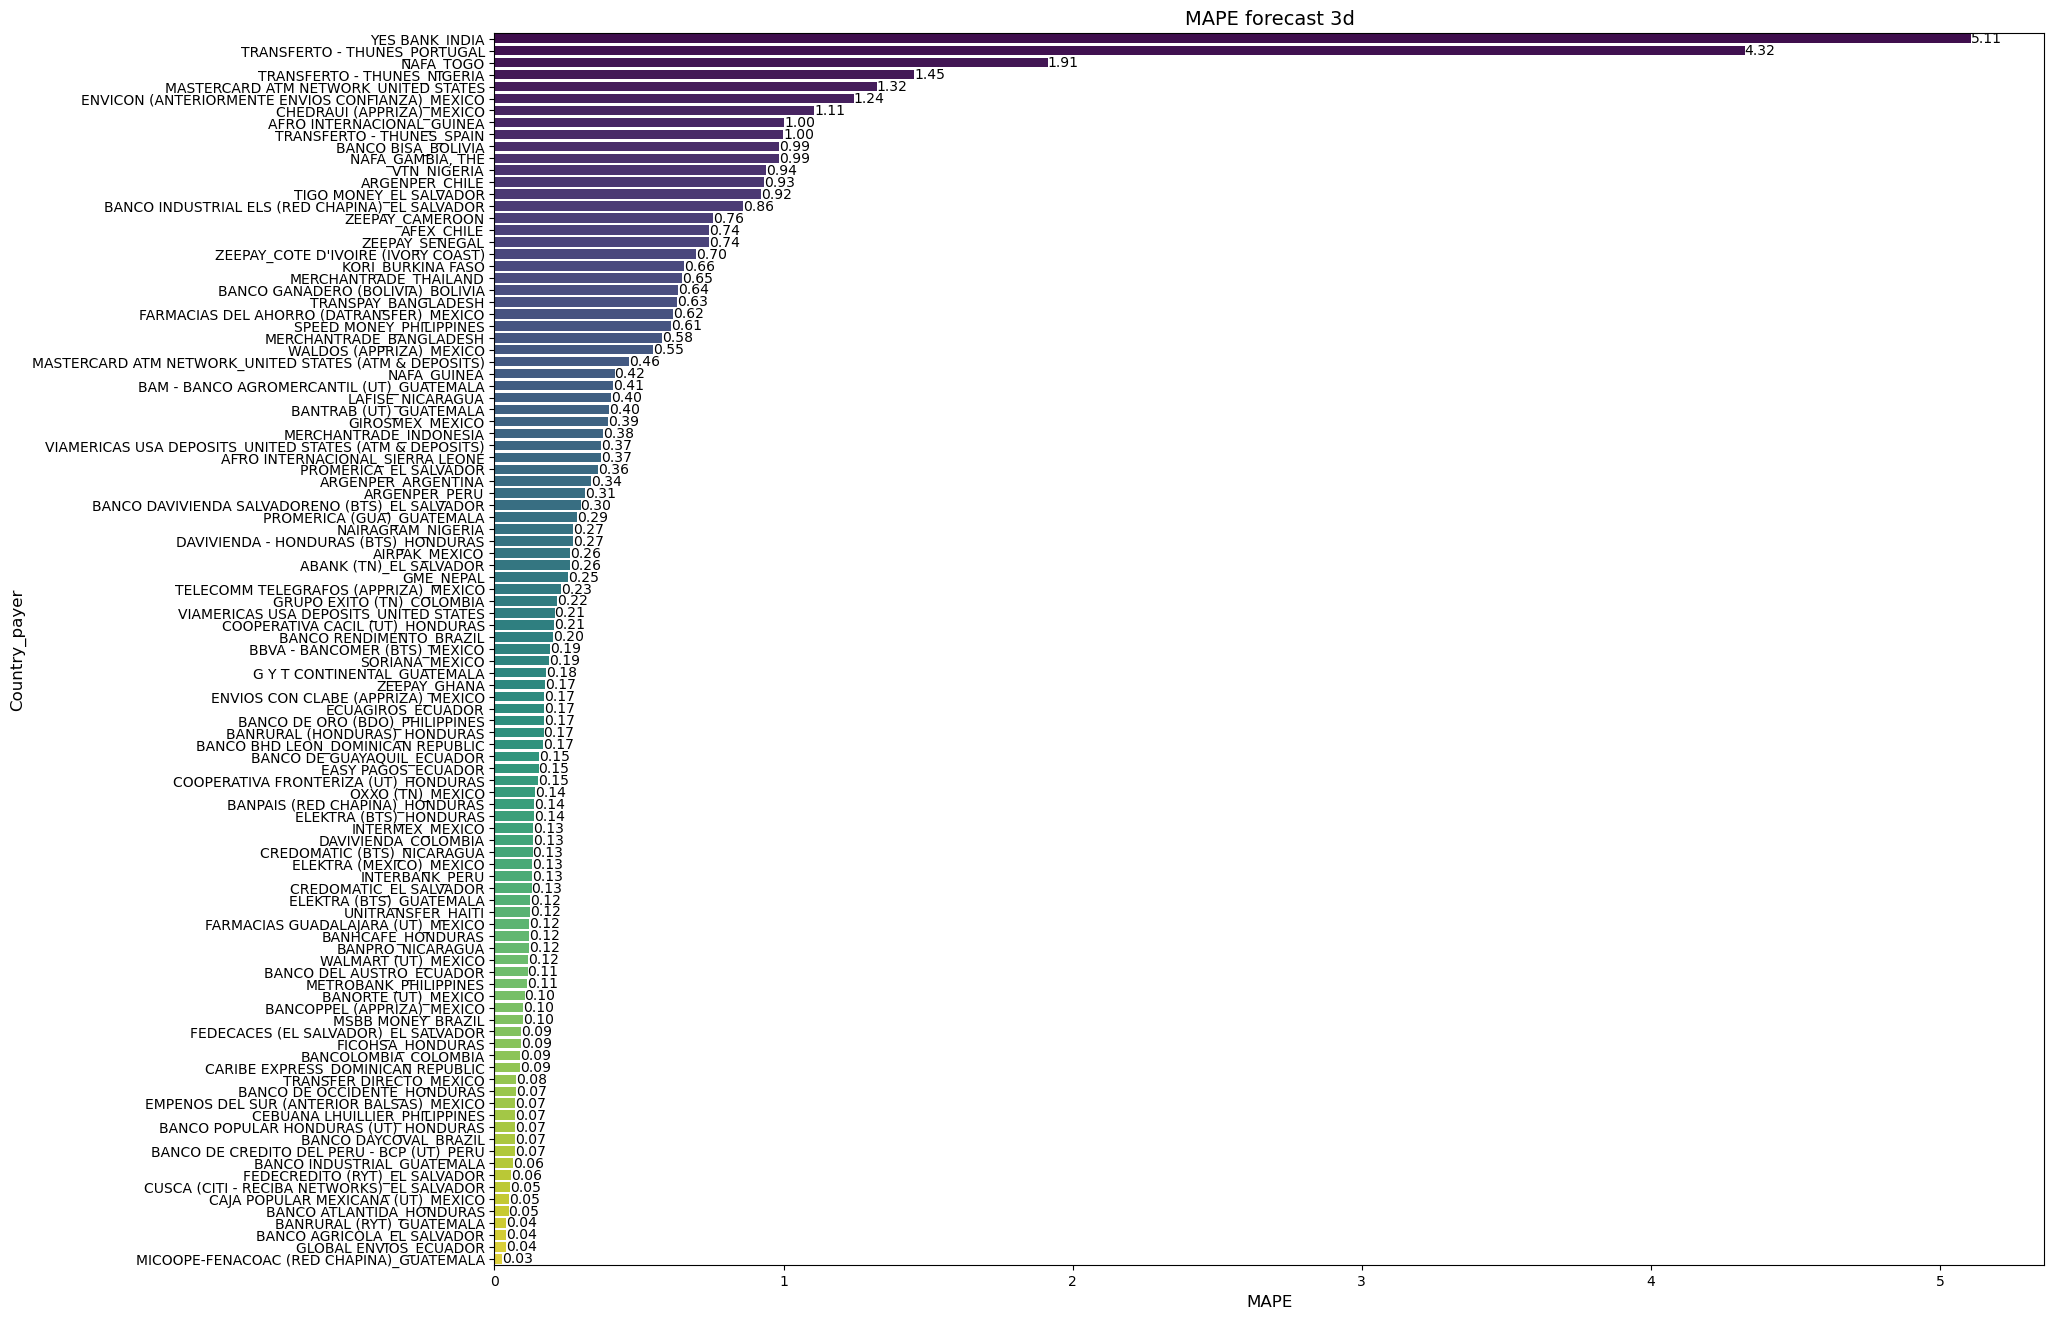

In [337]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_3d_payer_country = forecast_3d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_3d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE forecast 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [303]:
##FORECAST 3DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_3d_country = forecast_3d.groupby('country')['pe'].mean().reset_index()
forecast_3d_country=forecast_3d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


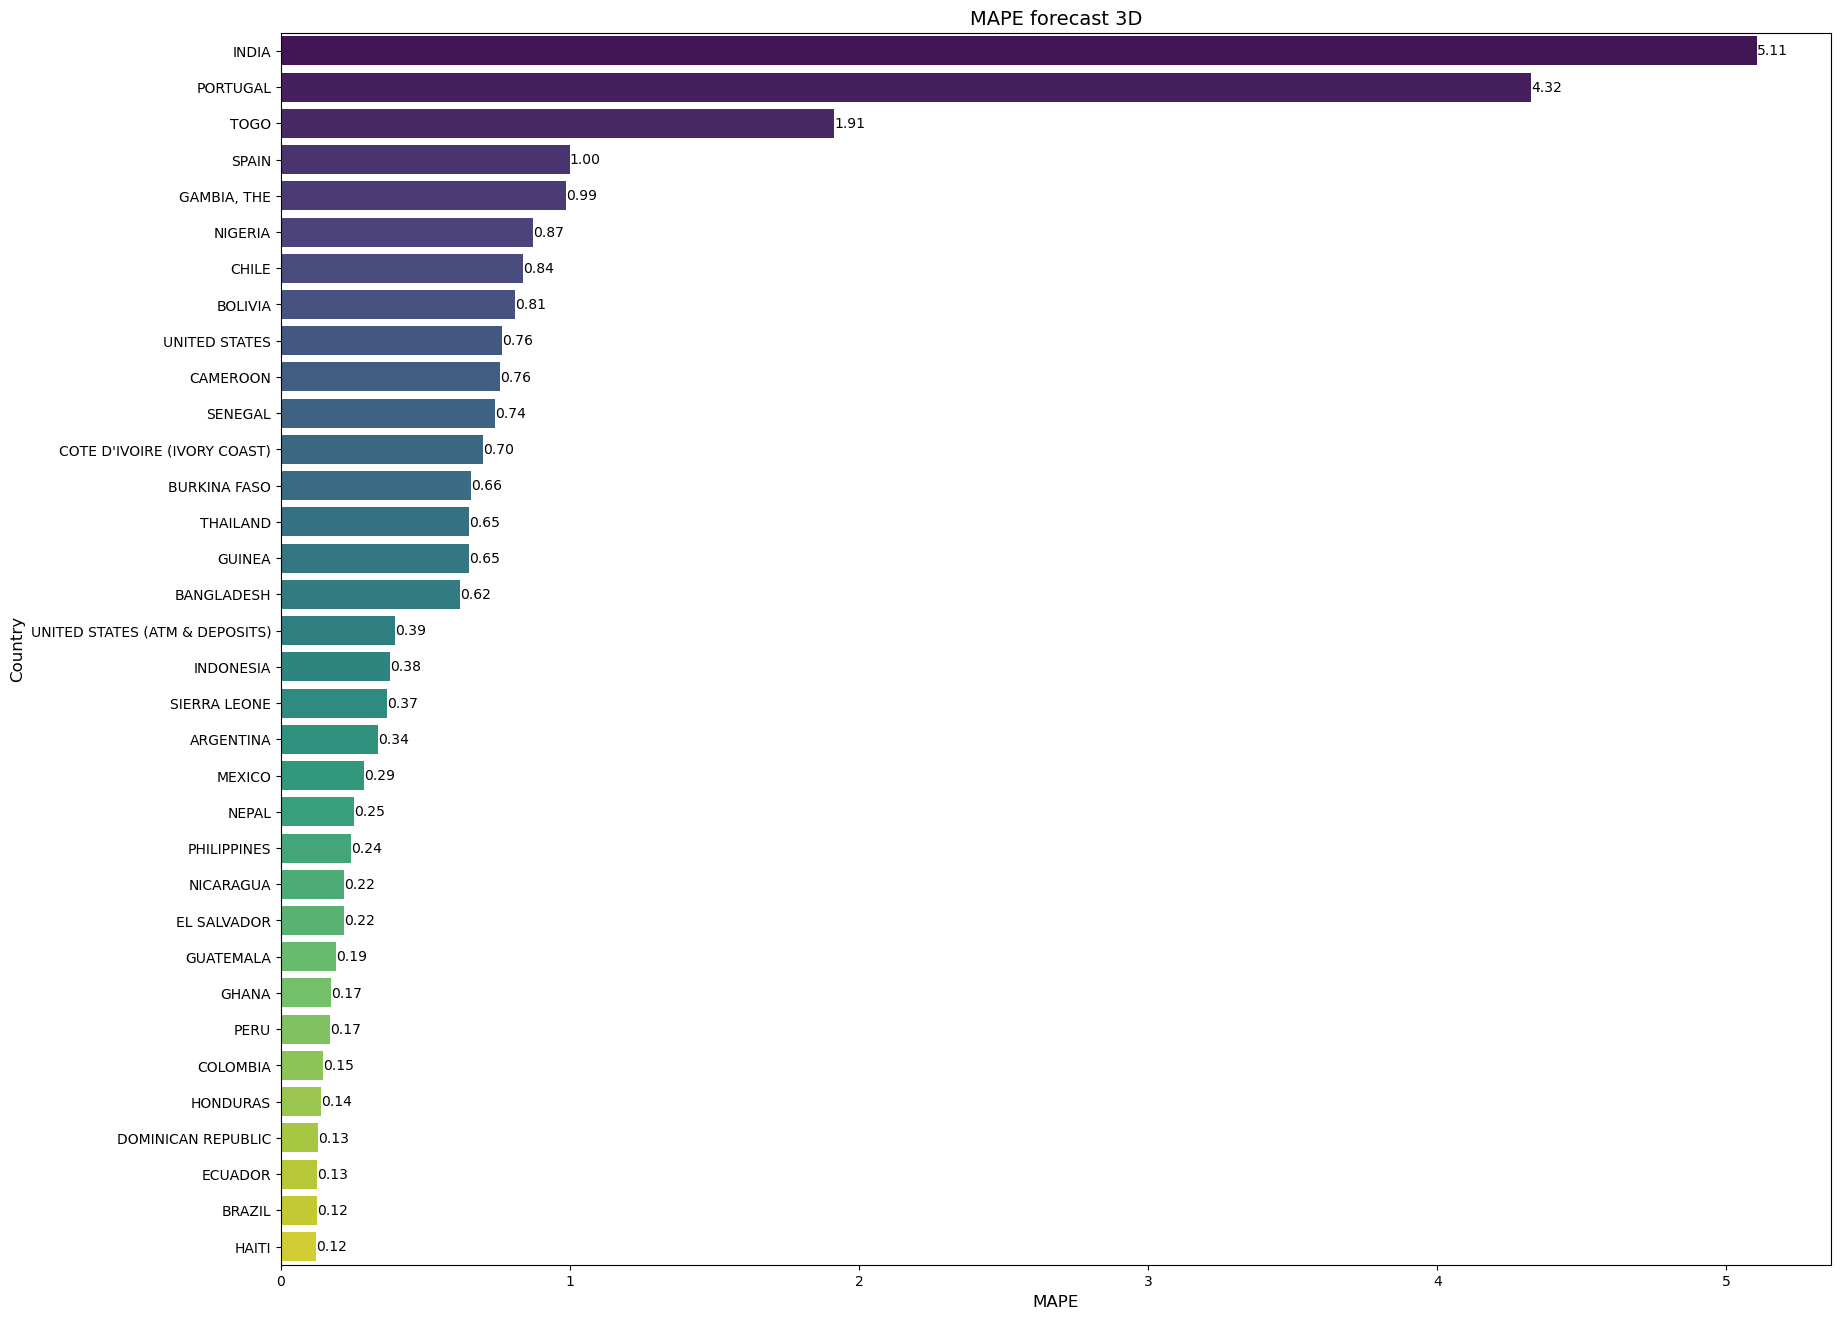

In [338]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_3d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE forecast 3D', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_3d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [305]:
##WAPE A 3 DÍAS GENERAL##
forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))
print(forecast_3d.ae.sum() / forecast_3d.amount.sum())

0.10846315385300619


/tmp/ipykernel_20/4007322800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_3d["ae"] = abs((forecast_3d.amount - forecast_3d['mean']))


In [306]:
##WAPE POR PAÍSES 3d##

In [307]:
wape_country_f3d = forecast_3d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


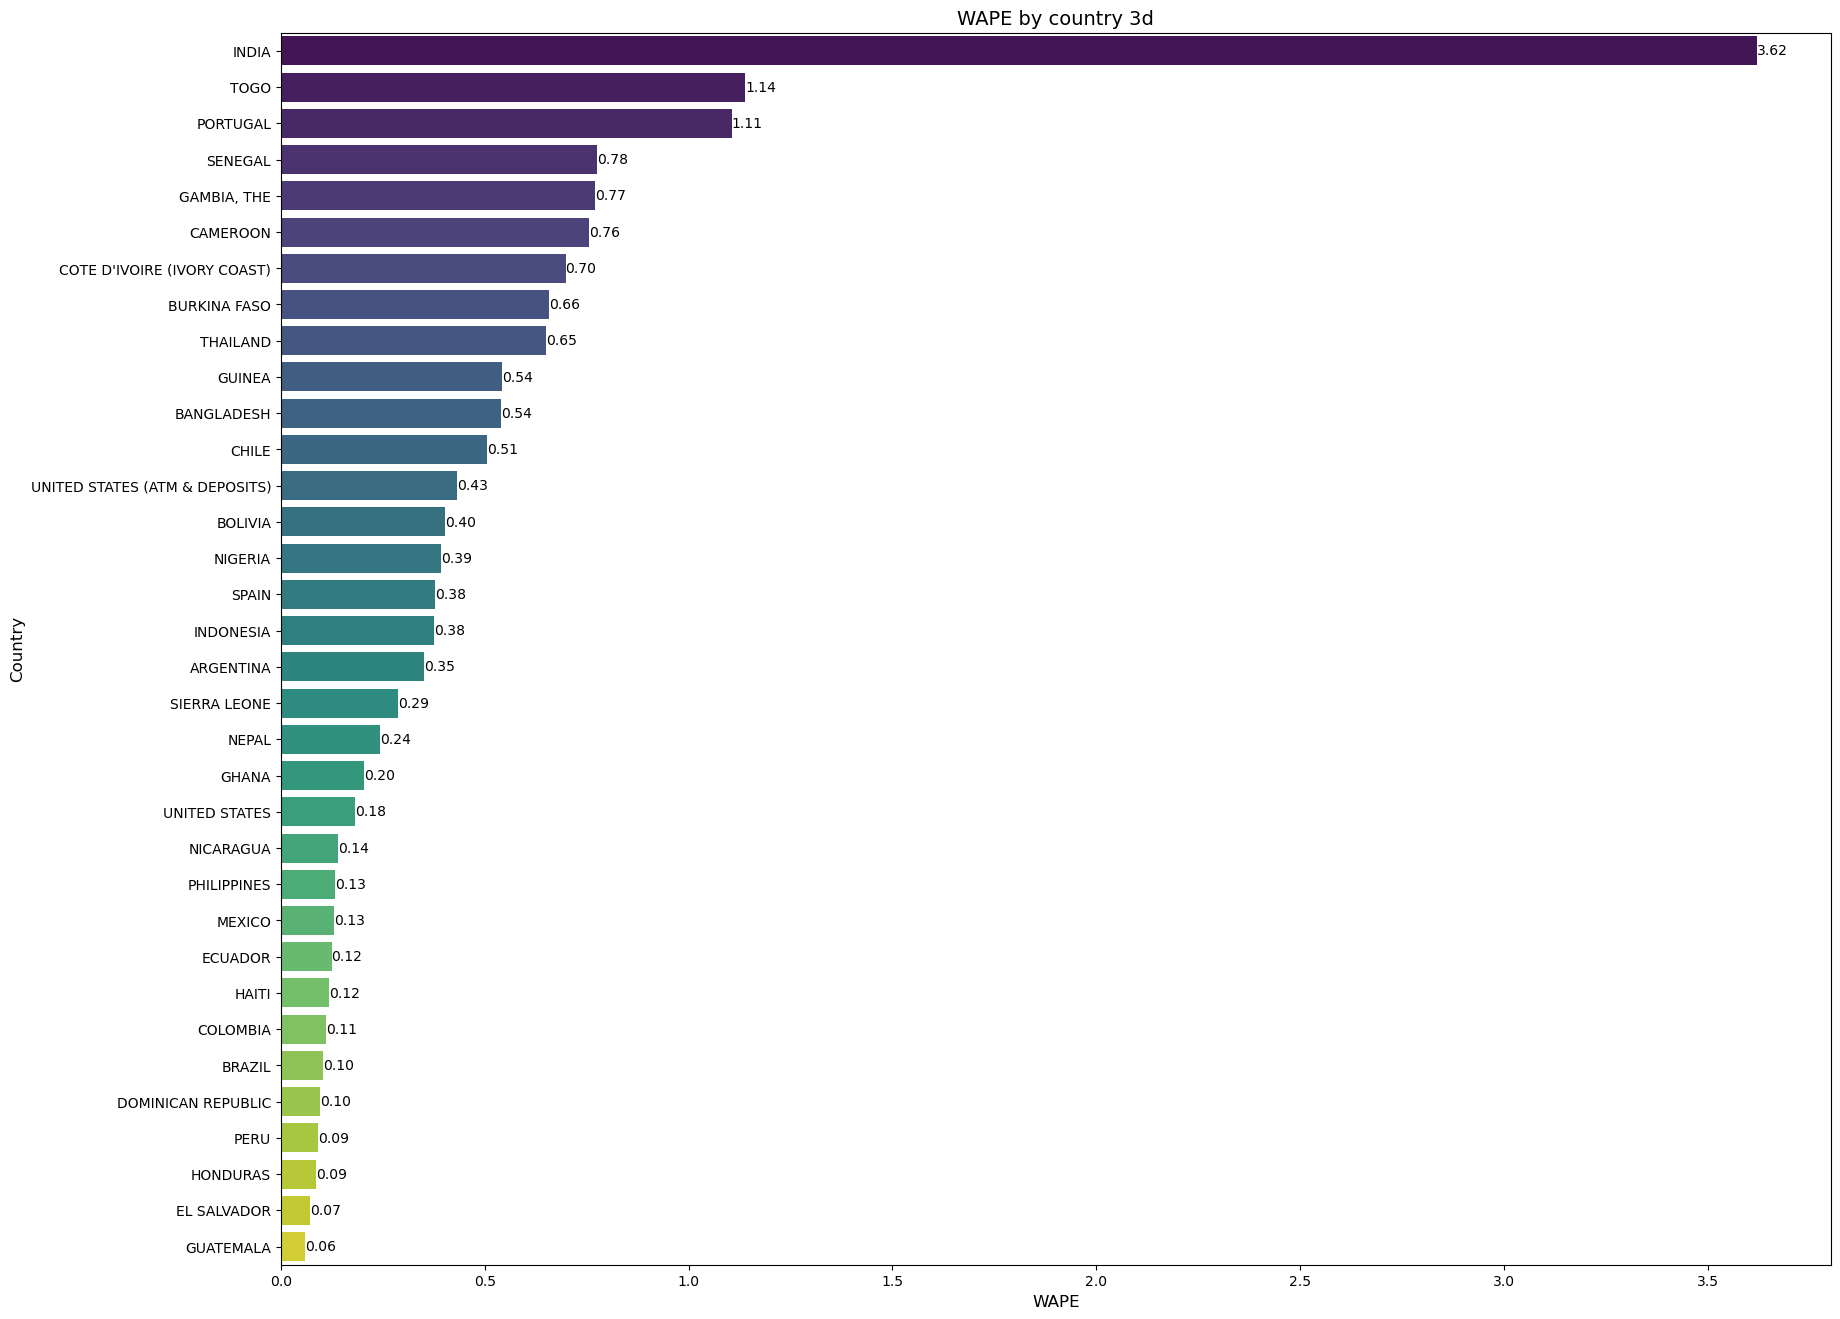

In [339]:
wape_country_f3d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f3d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 3d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f3d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [340]:
##MAPE A 7 DIAS##
###MAPE FORECAST 7 DÍAS##
forecast_7d=df_forecast_final

In [341]:
forecast_7d.shape

(659, 11)

In [342]:
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)

In [343]:
forecast_7d.date.min(),forecast_7d.date.max()

(Timestamp('2023-03-21 00:00:00'), Timestamp('2023-03-27 00:00:00'))

In [344]:
##MAPE PROMEDIO A 7 D (para los que tienen MAPE definido)
forecast_7d["pe"] = abs((forecast_7d.amount - forecast_7d['mean']) / forecast_7d.amount)
forecast_7d.pe.mean()

0.3993086696282858

In [314]:
##MAPE PROMEDIO A 7 DIAS POR PAYER

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


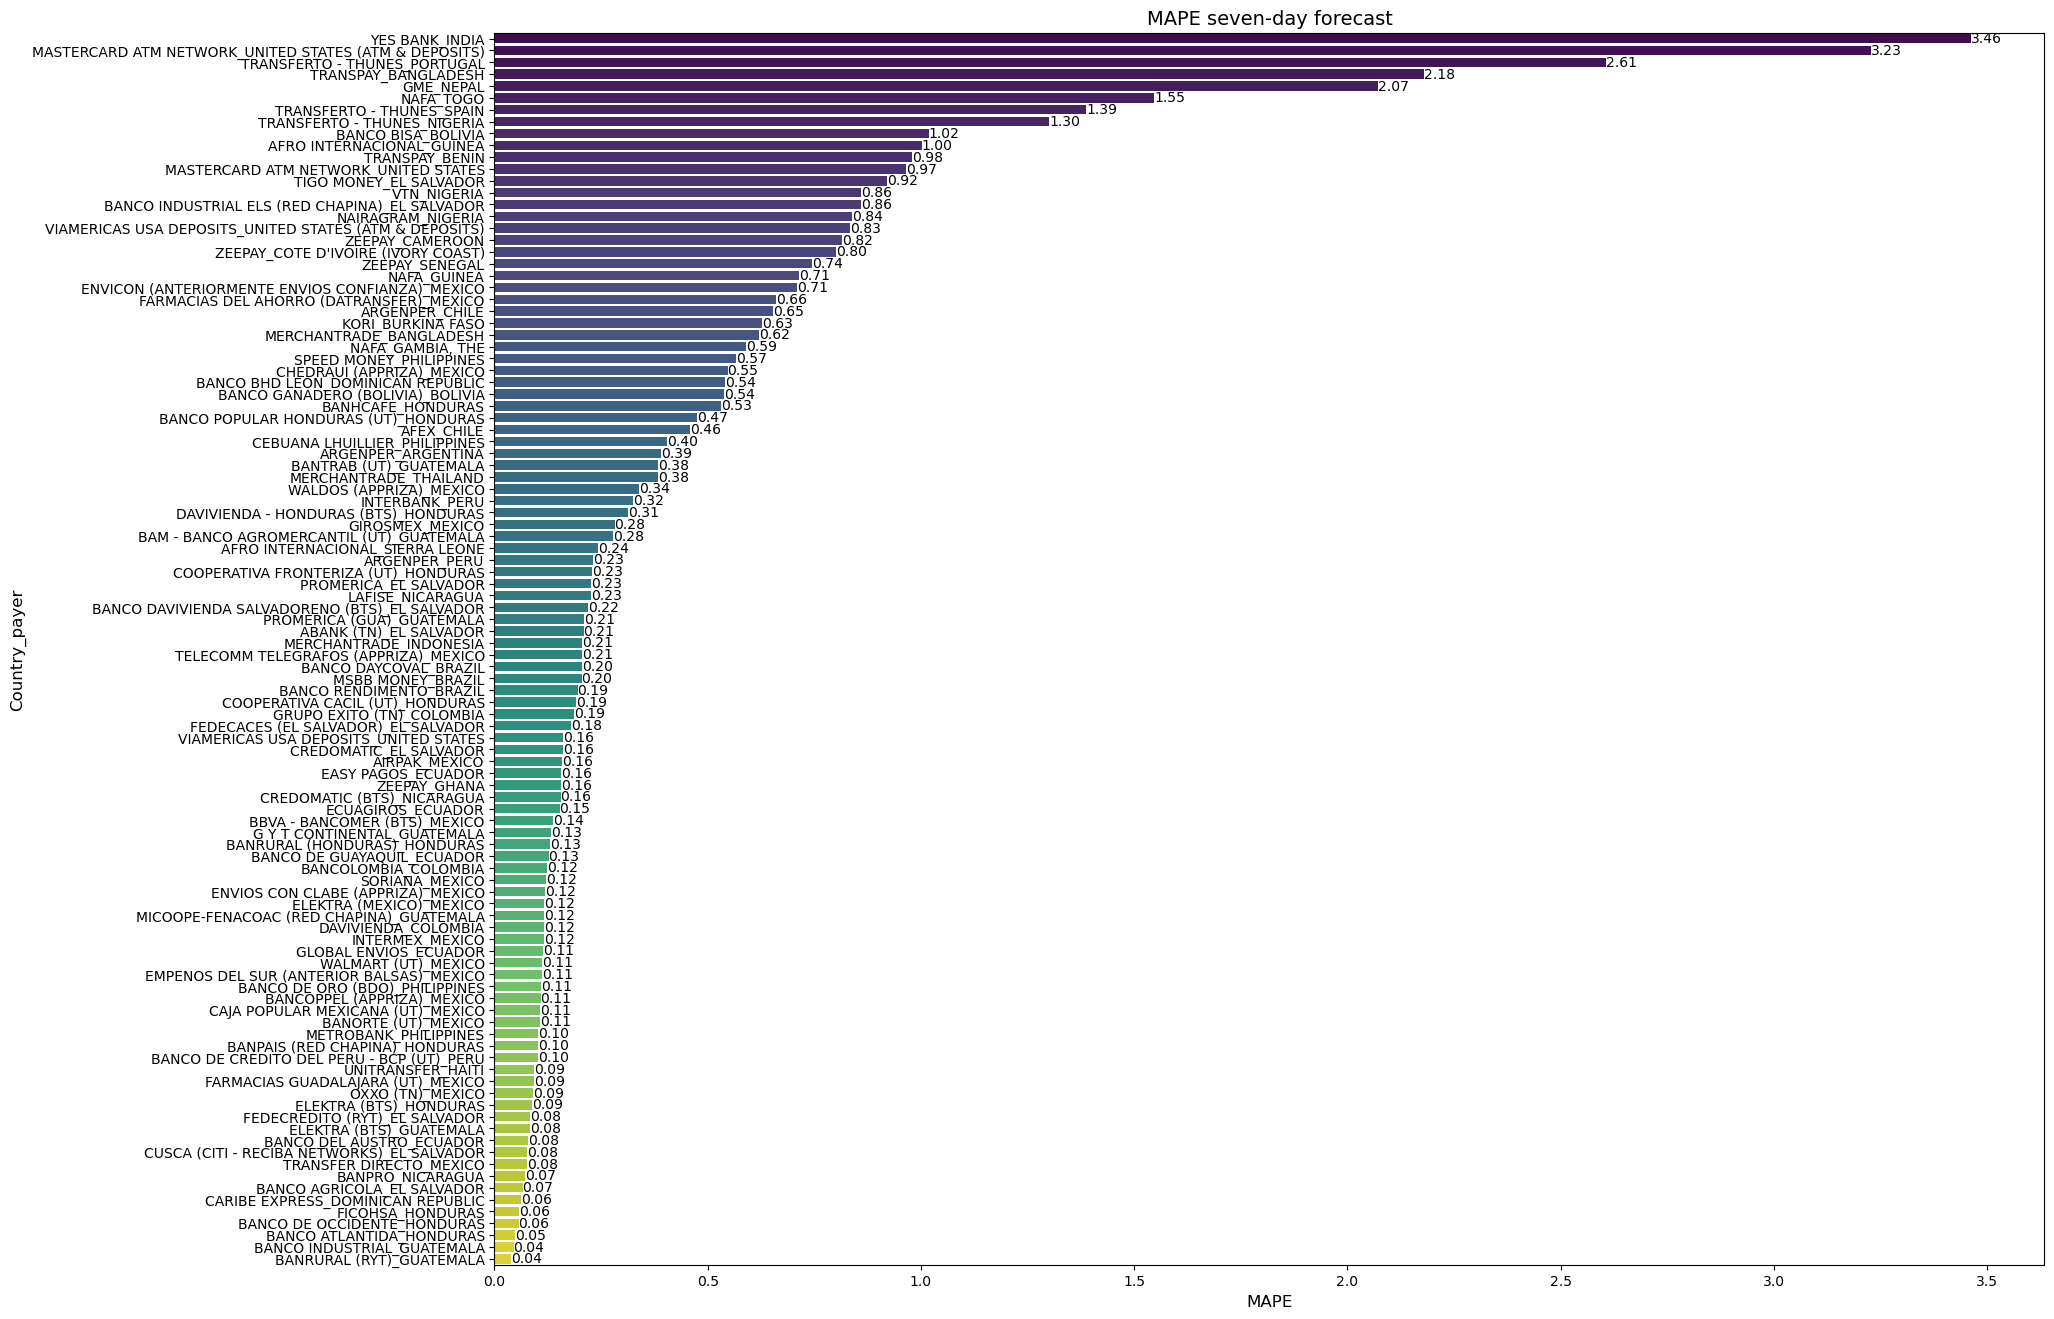

In [345]:
# Agrupar por 'payer_country' y calcular la suma de 'pe', luego ordenar por 'pe' de forma descendente
forecast_7d_payer_country = forecast_7d.groupby('payer_country')['pe'].mean().reset_index().sort_values(by='pe', ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(20,16))
bar_plot = sns.barplot(x='pe', y='payer_country', data=forecast_7d_payer_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country_payer', fontsize=12)
plt.title('MAPE seven-day forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_payer_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [316]:
##FORECAST 7DIAS  MAPE PROMEDIO SIMPLE POR PAÍS##
forecast_7d_country = forecast_7d.groupby('country')['pe'].mean().reset_index()
forecast_7d_country=forecast_7d_country.sort_values('pe', ascending=False)

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


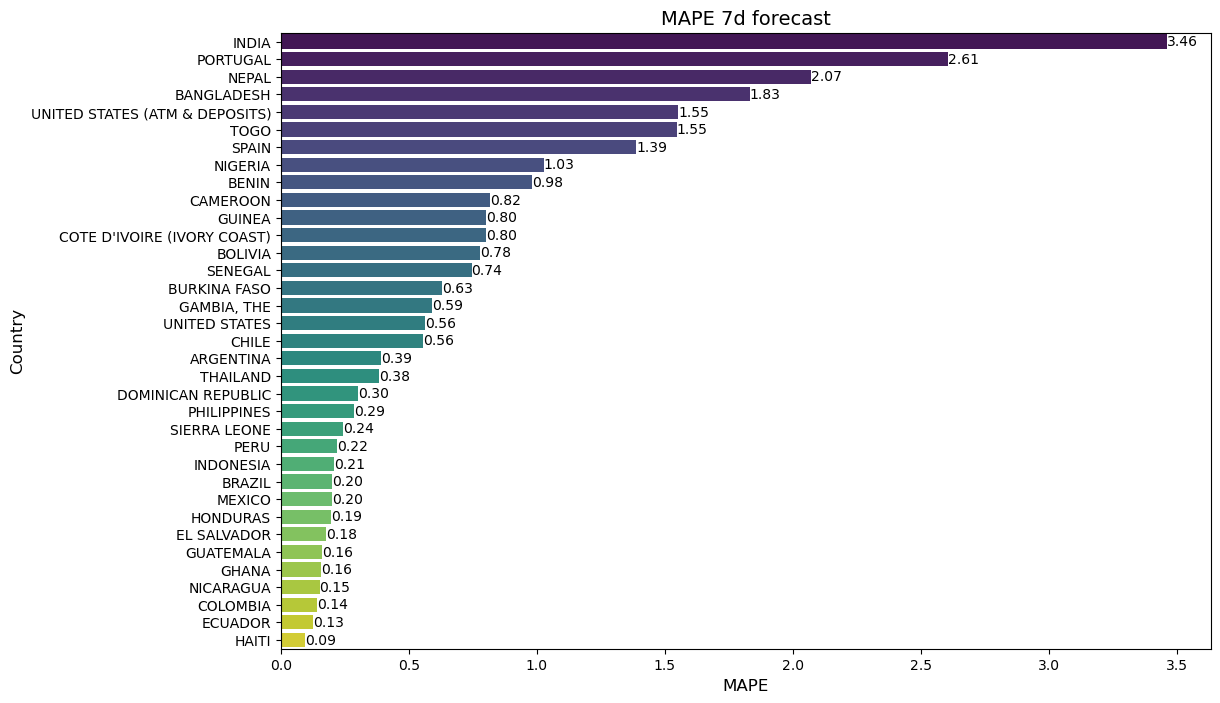

In [346]:
# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='pe', y='country', data=forecast_7d_country, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('MAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('MAPE 7d forecast', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(forecast_7d_country['pe']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()

In [347]:
##WAPE A 7 DIAS GENERAL##
forecast_7d=df_forecast_final
forecast_7d["ae"] = abs((forecast_7d.amount - forecast_7d['mean']))
print(forecast_7d.ae.sum() / forecast_7d.amount.sum())

0.09569406350150862


In [ ]:
#WAPE POR PAISES A 7 DIAS

In [348]:
wape_country_f7d = forecast_7d.groupby('country').apply(lambda x: (x['ae'].sum() / x['amount'].sum())).reset_index(name='wape')

/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


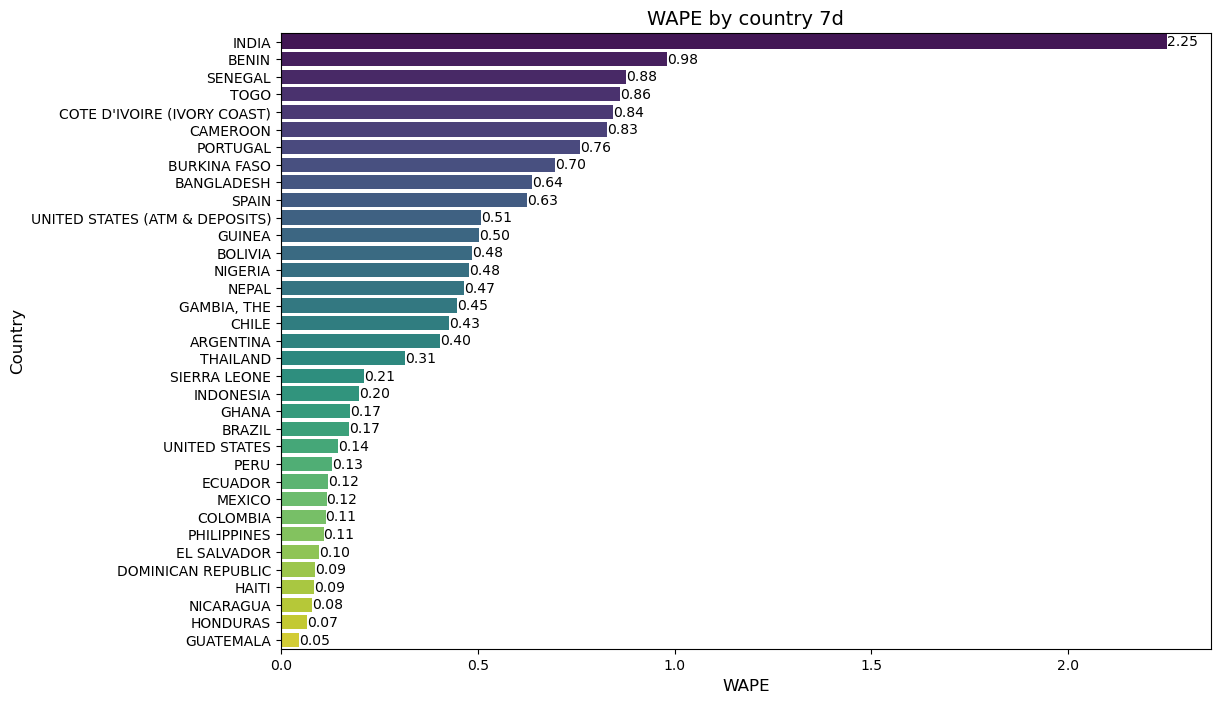

In [349]:
wape_country_f7d.sort_values('wape', inplace=True, ascending=False)

# Crear el gráfico de barras con seaborn
plt.figure(figsize=(12,8))
bar_plot = sns.barplot(x='wape', y='country', data=wape_country_f7d, palette='viridis')

# Ajustar el tamaño de las letras
plt.xlabel('WAPE', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('WAPE by country 7d', fontsize=14)

# Mostrar los valores de MAPE sobre las barras
for index, value in enumerate(wape_country_f7d['wape']):
    bar_plot.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=10)

plt.show()
